# Regression change of basis (SEER)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('SEER_expanded_v1210.csv')

data_M0 = df[(df['Metastasis']=='M0') & (df['Stage']!='0')]
data_M0 = data_M0.drop(columns=['Metastasis', 'Death_All_Cause_ext']).reset_index()

In [4]:
X_M0 = pd.get_dummies(data_M0[['DURATION', 'Sex', 'Yr_dx', 'Laterality', 'reg_nod_pos', 'reg_nod_ex',
       'Ulceration', 'Mitotic rate', 'Site_rec_WHO08',
       'Origin', 'AYA_site_rec20', 'Tot_num_in_situ', 'Tot_num_benin',
       'Mar_stat', 'Age_dx', 'Extent', 'Surg_LN', 'Surg_primsite',
       'Surg_oth', 'Tumor', 'Positive_Node', 'Stage', 'YEAR', 'AGE']], drop_first=False)
w_M0 = data_M0['EXPO']
Y_M0 = data_M0['Death_skin']

In [7]:
# Selected variables
col = ['DURATION', 'AGE', 'Sex_Female', 'reg_nod_pos',
       'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
       'Laterality_Not a paired site',
       'Laterality_One side', 'Laterality_Paired site',
       'Laterality_Paired site midline tumor', 'Laterality_Right origin',
       'Ulceration_Missing',
       'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
       'Site_rec_WHO08_Vulva',
       'Origin_American Indian/AK Native', 'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed', 'Extent_Distant',
       'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
       'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
       'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
       'Positive_Node_N1', 'Positive_Node_N2',
       'Positive_Node_N3']

### Pre-processing: change of basis
Center the variables to be in the space of centered random variables in which the covariance is the scalar product

In [8]:
scaler = StandardScaler(with_std=False)
data_norm = scaler.fit_transform(X_M0[col])
data_norm = pd.DataFrame(data_norm, columns=col)
data_norm

DURATION        AGE  Sex_Female  reg_nod_pos  Mitotic rate  \
0      -3.996436   6.558907   -0.464133    -0.093016     -0.477101   
1      -2.996436   7.558907   -0.464133    -0.093016     -0.477101   
2      -1.996436   8.558907   -0.464133    -0.093016     -0.477101   
3      -3.996436   0.558907    0.535867    -0.093016     -0.477101   
4      -2.996436   1.558907    0.535867    -0.093016     -0.477101   
...          ...        ...         ...          ...           ...   
538451 -3.996436  12.558907   -0.464133     0.906984      6.522899   
538452 -2.996436  13.558907   -0.464133     0.906984      6.522899   
538453 -1.996436  14.558907   -0.464133     0.906984      6.522899   
538454 -3.996436 -14.441093    0.535867    -0.093016     -0.477101   
538455 -3.996436  11.558907    0.535867    -0.093016     -0.477101   

        Tot_num_in_situ  Laterality_Bilateral  Laterality_Not a paired site  \
0              0.534341             -0.001484                     -0.068929   
1              0.534341             -0.001484                     -0.068929   
2              0.534341             -0.001484                     -0.068929   
3              2.534341             -0.001484                     -0.068929   
4              2.534341             -0.001484                     -0.068929   
...                 ...                   ...                           ...   
538451        -0.465659             -0.001484                     -0.068929   
538452        -0.465659             -0.001484                     -0.068929   
538453        -0.465659             -0.001484                     -0.068929   
538454        -0.465659             -0.001484                     -0.068929   
538455        -0.465659             -0.001484                     -0.068929   

        Laterality_One side  Laterality_Paired site  ...  \
0                 -0.011698               -0.049848  ...   
1                 -0.011698               -0.049848  ...   
2                 -0.011698               -0.049848  ...   
3                 -0.011698               -0.049848  ...   
4                 -0.011698               -0.049848  ...   
...                     ...                     ...  ...   
538451            -0.011698               -0.049848  ...   
538452            -0.011698               -0.049848  ...   
538453            -0.011698               -0.049848  ...   
538454            -0.011698               -0.049848  ...   
538455            -0.011698               -0.049848  ...   

        Surg_primsite_No surgery  Tumor_Missing  Tumor_T0  Tumor_T2  Tumor_T3  \
0                      -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
1                      -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
2                      -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
3                      -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
4                      -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
...                          ...            ...       ...       ...       ...   
538451                 -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
538452                 -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
538453                 -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
538454                 -0.022293      -0.037336 -0.003928 -0.132674 -0.061374   
538455                  0.977707       0.962664 -0.003928 -0.132674 -0.061374   

        Tumor_T4  Positive_Node_Missing  Positive_Node_N1  Positive_Node_N2  \
0      -0.032948              -0.031343          -0.03622         -0.014545   
1      -0.032948              -0.031343          -0.03622         -0.014545   
2      -0.032948              -0.031343          -0.03622         -0.014545   
3      -0.032948              -0.031343          -0.03622         -0.014545   
4      -0.032948              -0.031343          -0.03622         -0.014545   
...          ...                    ...           

In [9]:
E = np.array(data_norm[['Sex_Female', 'Origin_American Indian/AK Native',
       'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed',
       'DURATION', 'AGE', 'reg_nod_pos',
       'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
       'Laterality_Not a paired site',
       'Laterality_One side', 'Laterality_Paired site',
       'Laterality_Paired site midline tumor', 'Laterality_Right origin',
       'Ulceration_Missing',
       'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
       'Site_rec_WHO08_Vulva',
       'Extent_Distant',
       'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
       'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
       'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
       'Positive_Node_N1', 'Positive_Node_N2',
       'Positive_Node_N3']])

s = 11 # index of last sensitive variable
n = E.shape[1]

Implement the system and solve it

In [205]:
X_trans = pd.DataFrame()
A = np.zeros((n,n))
A[:s+1,:s+1] = np.identity(s+1)
for i in range(s+1, n):
    fun = lambda a: (E@a.T-E[:, i]).T @ (E@a.T-E[:, i])
    cons = ({'type': 'eq', 'fun': lambda a: E[:, :s+1].T @ E@a.T},
            {'type': 'eq', 'fun': lambda a: np.append(a[s+1:i],a[i+1:])})
    res = minimize(fun, np.zeros(n), constraints=cons)
    A[i,:] = res.x
    X_trans[['Sex_Female', 'Origin_American Indian/AK Native',
       'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed',
       'DURATION', 'AGE', 'reg_nod_pos',
       'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
       'Laterality_Not a paired site',
       'Laterality_One side', 'Laterality_Paired site',
       'Laterality_Paired site midline tumor', 'Laterality_Right origin',
       'Ulceration_Missing',
       'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
       'Site_rec_WHO08_Vulva',
       'Extent_Distant',
       'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
       'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
       'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
       'Positive_Node_N1', 'Positive_Node_N2',
       'Positive_Node_N3'][i]] = E @ res.x.T

In [12]:
X_trans

DURATION        AGE  reg_nod_pos  Mitotic rate  Tot_num_in_situ  \
0      -3.934078   3.856905    -0.027594     -0.231962         0.455633   
1      -2.934078   4.856905    -0.027594     -0.231962         0.455633   
2      -1.934078   5.856904    -0.027594     -0.231962         0.455633   
3      -4.191044   3.512898     0.009008     -0.114933         2.602008   
4      -3.191044   4.512898     0.009008     -0.114933         2.602008   
...          ...        ...          ...           ...              ...   
538451 -3.901050   8.709133     0.874253      6.381941        -0.561354   
538452 -2.901050   9.709132     0.874253      6.381941        -0.561354   
538453 -1.901049  10.709132     0.874253      6.381941        -0.561354   
538454 -4.191044 -11.487097     0.009008     -0.114933        -0.397995   
538455 -3.709506  17.625407     0.044535     -0.050589        -0.010600   

        Laterality_Bilateral  Laterality_Not a paired site  \
0                  -0.001013                     -0.078563   
1                  -0.001013                     -0.078563   
2                  -0.001013                     -0.078563   
3                  -0.000704                     -0.025592   
4                  -0.000704                     -0.025592   
...                      ...                           ...   
538451             -0.001755                     -0.100400   
538452             -0.001755                     -0.100400   
538453             -0.001755                     -0.100400   
538454             -0.000704                     -0.025592   
538455             -0.000637                     -0.006859   

        Laterality_One side  Laterality_Paired site  \
0                 -0.018116               -0.076552   
1                 -0.018116               -0.076552   
2                 -0.018116               -0.076552   
3                 -0.014296               -0.058179   
4                 -0.014296               -0.058179   
...                     ...                     ...   
538451            -0.011369               -0.050841   
538452            -0.011369               -0.050841   
538453            -0.011369               -0.050841   
538454            -0.014296               -0.058179   
538455            -0.011491               -0.064299   

        Laterality_Paired site midline tumor  ...  Surg_primsite_No surgery  \
0                                  -0.033010  ...                 -0.038082   
1                                  -0.033010  ...                 -0.038082   
2                                  -0.033010  ...                 -0.038082   
3                                  -0.024456  ...                 -0.035852   
4                                  -0.024456  ...                 -0.035852   
...                                      ...  ...                       ...   
538451                              0.972899  ...                 -0.014084   
538452                              0.972899  ...                 -0.014084   
538453                              0.972899  ...                 -0.014084   
538454                             -0.024456  ...                 -0.035852   
538455                             -0.036335  ...                  0.897806   

        Tumor_Missing  Tumor_T0  Tumor_T2  Tumor_T3  Tumor_T4  \
0           -0.051531 -0.001428 -0.053373 -0.028191 -0.013655   
1           -0.051531 -0.001428 -0.053373 -0.028191 -0.013655   
2           -0.051531 -0.001428 -0.053373 -0.028191 -0.013655   
3           -0.050490  0.000466 -0.043074 -0.007862 -0.000281   
4           -0.050490  0.000466 -0.043074 -0.007862 -0.000281   
...               ...       ...       ...       ...       ...   
538451      -0.030442 -0.005994 -0.171367 -0.083144  0.957664   
538452      -0.030442 -0.005994 -0.171367 -0.083144  0.957664   
538453      -0.030442 -0.005994 -0.171367 -0.083144  0.957664   
538454      -0.050490  0.000466 -0.043074 -0.007862 -0.000281   
538455       0.929072  0.002332 -0.00

### Comparing the correlation matrix before and after transformation

In [ ]:
data_corr = X_trans.copy()
# add the sensitive variables
data_corr[['Sex_Female', 'Origin_American Indian/AK Native', 'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed']] = X_M0[['Sex_Female', 'Origin_American Indian/AK Native', 'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed']]

plt.figure(figsize=(25, 20))
sns.heatmap(data_corr[['Sex_Female', 'Origin_American Indian/AK Native',
       'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed',
       'DURATION', 'AGE', 'reg_nod_pos',
       'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
       'Laterality_Not a paired site',
       'Laterality_One side', 'Laterality_Paired site',
       'Laterality_Paired site midline tumor', 'Laterality_Right origin',
       'Ulceration_Missing',
       'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
       'Site_rec_WHO08_Vulva',
       'Extent_Distant',
       'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
       'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
       'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
       'Positive_Node_N1', 'Positive_Node_N2',
       'Positive_Node_N3']].corr(), vmin=-1, vmax=1, cmap='coolwarm')
# plt.savefig('heatmap_seer_changebasis_v1011.png')

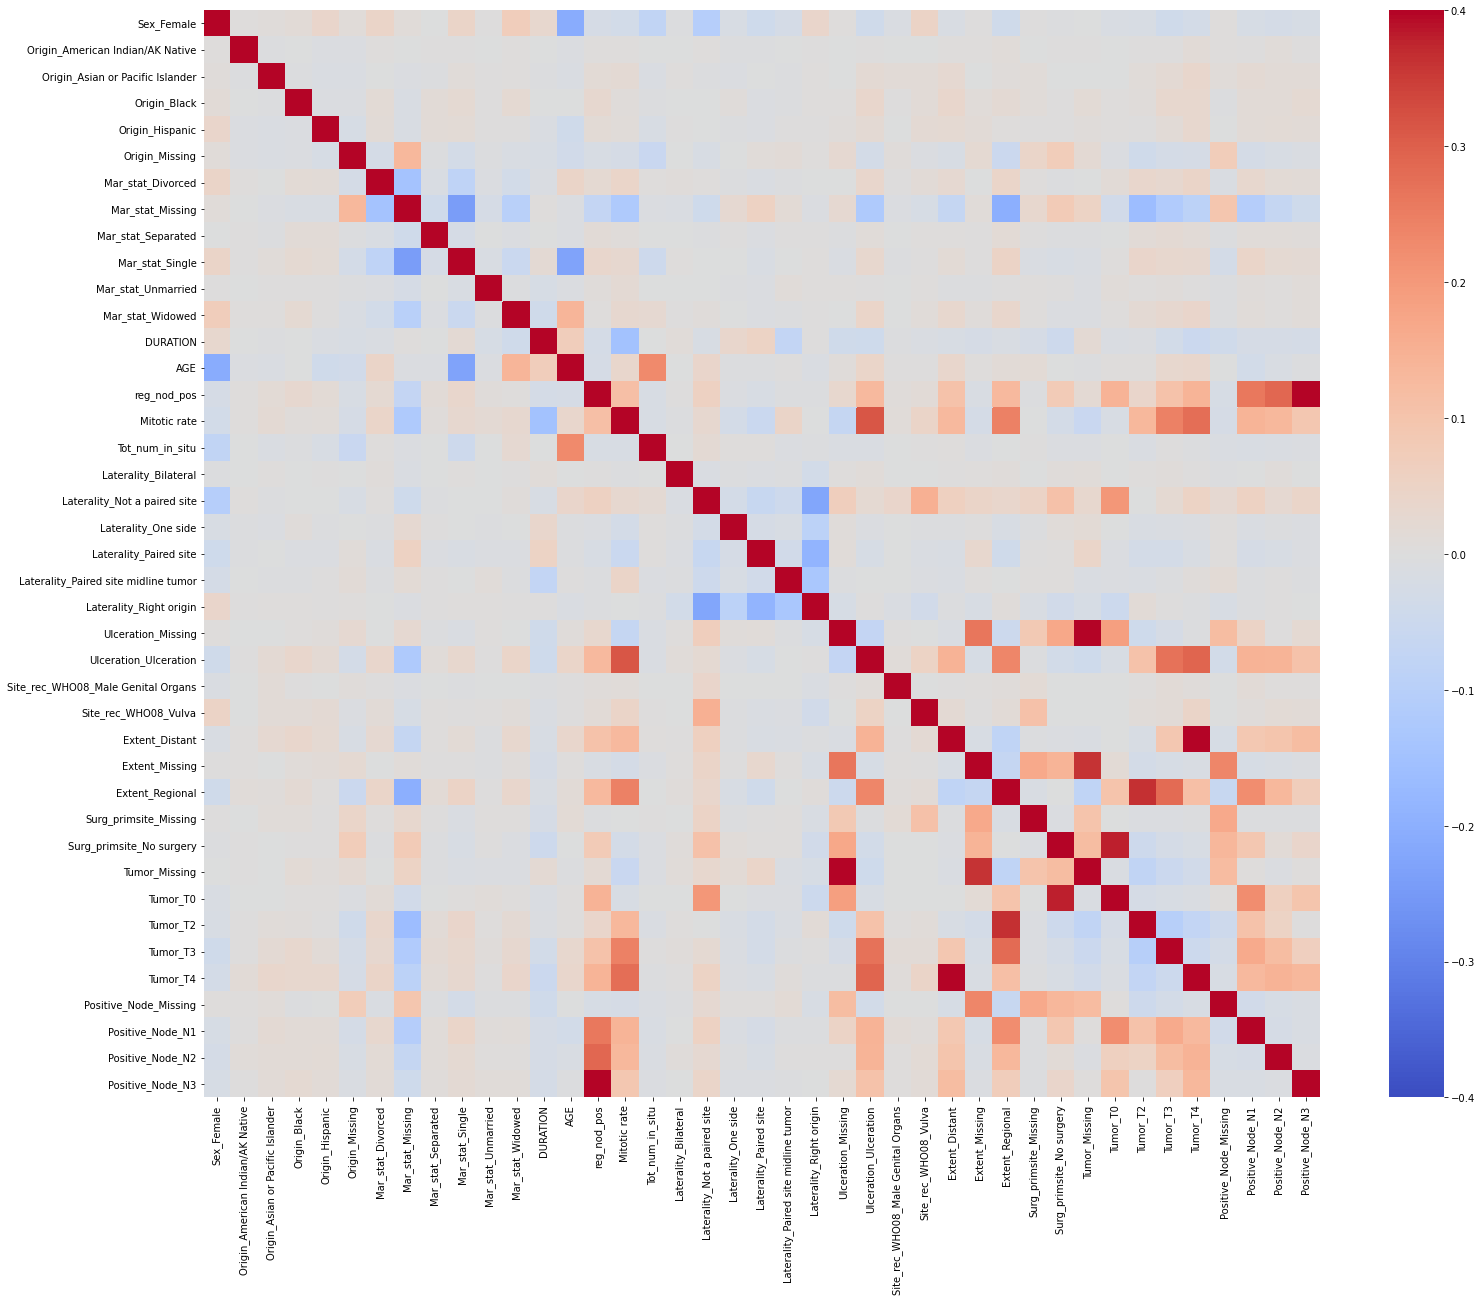

In [230]:
plt.figure(figsize=(25, 20))
sns.heatmap(X_M0[data_corr[['Sex_Female', 'Origin_American Indian/AK Native',
       'Origin_Asian or Pacific Islander',
       'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
       'Mar_stat_Divorced', 'Mar_stat_Missing',
       'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
       'Mar_stat_Widowed',
       'DURATION', 'AGE', 'reg_nod_pos',
       'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
       'Laterality_Not a paired site',
       'Laterality_One side', 'Laterality_Paired site',
       'Laterality_Paired site midline tumor', 'Laterality_Right origin',
       'Ulceration_Missing',
       'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
       'Site_rec_WHO08_Vulva',
       'Extent_Distant',
       'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
       'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
       'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
       'Positive_Node_N1', 'Positive_Node_N2',
       'Positive_Node_N3']].columns].corr(), vmin=-1, vmax=1, cmap='coolwarm')
# plt.savefig('heatmap_seer_nochangebasis_v1011.png')

### Apply the model

In [22]:
x_M0_train, x_M0_test, y_M0_train, y_M0_test, w_M0_train, w_M0_test = train_test_split(X_trans, Y_M0, w_M0, test_size=0.2, stratify=Y_M0)

In [23]:
x_M0_train = sm.add_constant(x_M0_train)
x_M0_test = sm.add_constant(x_M0_test)

In [24]:
mod_all_M0 = sm.GLM(y_M0_train, x_M0_train, family=sm.genmod.families.family.Binomial(), freq_weights=w_M0_train)

In [25]:
res_all_M0 = mod_all_M0.fit()

print(res_all_M0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Death_skin   No. Observations:               430764
Model:                            GLM   Df Residuals:                404737.67
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14586.
Date:                Fri, 04 Nov 2022   Deviance:                       29172.
Time:                        17:35:28   Pearson chi2:                 3.62e+05
No. Iterations:                     9   Pseudo R-squ. (CS):            0.01495
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [26]:
data_pred = data_M0.loc[x_M0_test.index, :]

In [27]:
data_pred['Y_pred proba'] = res_all_M0.predict(x_M0_test)

### Coefficients of the model

<BarContainer object of 29 artists>

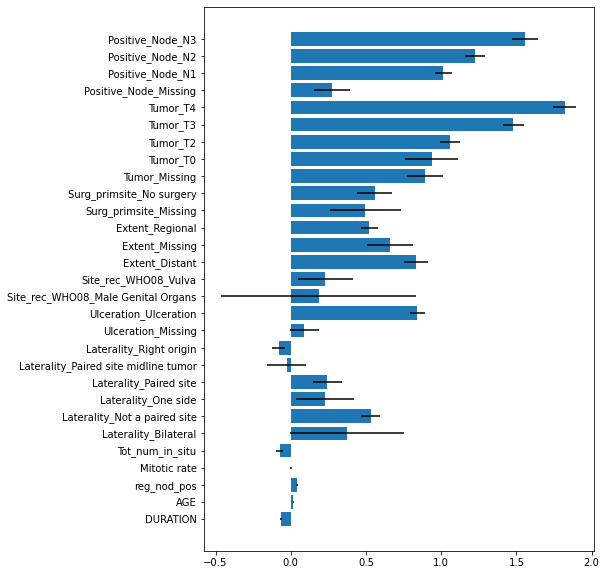

In [233]:
plt.figure(figsize=(7,10))
plt.barh(res_all_M0.params.index.tolist()[1:], res_all_M0.params[1:], xerr=res_all_M0.bse[1:])
# plt.savefig('seer_coeff_changebasis_v411.png')

### Performance metrics

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(data_pred['Death_skin'], data_pred['Y_pred proba'], sample_weight=w_M0_test)

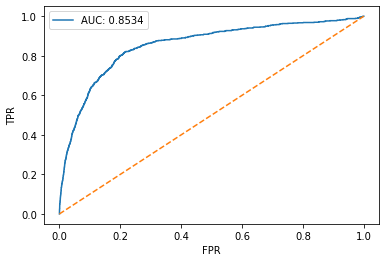

In [234]:
plt.plot(fpr, tpr, label='AUC: ' + str(np.round(metrics.roc_auc_score(data_pred['Death_skin'], data_pred['Y_pred proba'], sample_weight=w_M0_test), 4)))
plt.plot([0, 1], [0, 1], linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
# plt.savefig('ROC_seer_changebasis_v411.png')

### Threshold for classification

In [32]:
data_M0['Death_skin'].value_counts()[1]/data_M0.shape[0]

0.007025643692335121

In [33]:
for i in np.linspace(0.1075, 0.11, 5):
    data_pred['Y_pred' + str(i)] = data_pred['Y_pred proba'] > i
    print(i, data_pred['Y_pred' + str(i)].value_counts()[1]/data_pred.shape[0])

In [ ]:
# Threshold of 0.10875 gives the same proportion for predicted deaths

### Fairness metrics

In [216]:
Y = 'Death_skin'
Y_pred = 'Y_pred0.10875'
S = 'Mar_stat'
list_sens = data_pred[S].unique()

Global fairness metrics

In [139]:
FPs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[1, 0]
FNs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[0, 1]
TPs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[0, 0]
TNs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[1, 1]

In [217]:
ARs = (TPs+FPs)/(TPs+FPs+FNs+TNs)
TPRs = TPs/(TPs+FNs)
FPRs = FPs/(FPs+TNs)
print(ARs, TPRs, FPRs)

Group-wise fairness metrics

In [218]:
FPs_S=[]
FNs_S=[]
TPs_S=[]
TNs_S=[]

for sens in list_sens:
    if metrics.confusion_matrix(data_pred[data_pred[S] == sens][Y], data_pred[data_pred[S] == sens][Y_pred]).shape == (2, 2):
        FPs_S.append(metrics.confusion_matrix(data_pred[data_pred[S] == sens][Y], data_pred[data_pred[S] == sens][Y_pred])[1, 0])
        FNs_S.append(metrics.confusion_matrix(data_pred[data_pred[S] == sens][Y], data_pred[data_pred[S] == sens][Y_pred])[0, 1])
        TPs_S.append(metrics.confusion_matrix(data_pred[data_pred[S] == sens][Y], data_pred[data_pred[S] == sens][Y_pred])[0, 0])
        TNs_S.append(metrics.confusion_matrix(data_pred[data_pred[S] == sens][Y], data_pred[data_pred[S] == sens][Y_pred])[1, 1])
    else:
        print(sens)

In [91]:
# for Origin, there are only TP
data_pred[data_pred['Origin'] == 'Missing'][Y_pred].value_counts(), data_pred[data_pred['Origin'] == 'Missing'][Y].value_counts()

(False    32230
 True        74
 Name: Y_pred0.10875, dtype: int64,
 0    32234
 1       70
 Name: Death_skin, dtype: int64)

In [219]:
ARs_S = np.array([(TPs_S[i]+FPs_S[i])/(TPs_S[i]+FPs_S[i]+FNs_S[i]+TNs_S[i]) for i in range(len(FPs_S))])
TPRs_S = np.array([TPs_S[i]/(TPs_S[i]+FNs_S[i]) for i in range(len(FPs_S))])
FPRs_S = np.array([FPs_S[i]/(FPs_S[i]+TNs_S[i]) for i in range(len(FPs_S))])
print(ARs_S, TPRs_S, FPRs_S)
print(np.var(ARs_S), np.var(TPRs_S), np.var(FPRs_S))

<ipython-input-219-73fedd2904d7>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  FPRs_S = np.array([FPs_S[i]/(FPs_S[i]+TNs_S[i]) for i in range(len(FPs_S))])


In [153]:
# list_sens, list_sens[[1,0,2,3,4,6,5]]

(array(['Missing', 'Married', 'Single', 'Widowed', 'Divorced', 'Unmarried',
        'Separated'], dtype=object),
 array(['Married', 'Missing', 'Single', 'Widowed', 'Divorced', 'Separated',
        'Unmarried'], dtype=object))

In [176]:
# # Origin
# list_sens, list_sens[[0,1,5,2,4,3]]

(array(['White', 'Hispanic', 'Asian or Pacific Islander', 'Missing',
        'American Indian/AK Native', 'Black'], dtype=object),
 array(['White', 'Hispanic', 'Black', 'Asian or Pacific Islander',
        'American Indian/AK Native', 'Missing'], dtype=object))

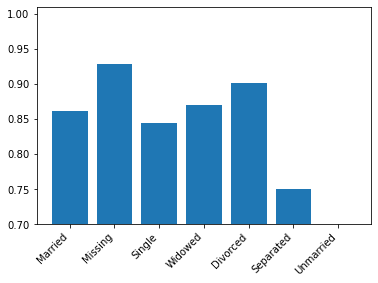

In [226]:
plt.bar(list_sens, FPRs_S)
plt.ylim((0.7,1.01))
plt.xticks(rotation=45, ha="right")
# plt.savefig('seer_FPR_marstat_changebasis_v1011.png')